Importing the dataset

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train = pd.read_csv(r'C:\Users\Gian\Documents\Coding\ML_Basics\Logistic_Regression\titanic_train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for null values

In [53]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

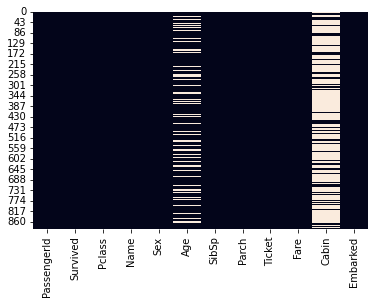

In [54]:
sns.heatmap(train.isnull(), cbar=False)


The age null values represents more than 15% of the total dataset and the cabin null values represents more than 70% of the total dataset

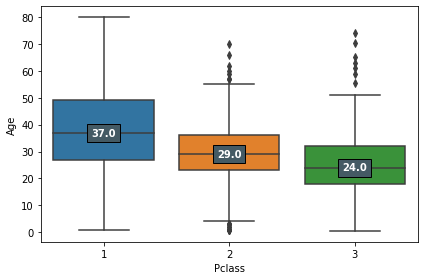

In [55]:
box_plot = sns.boxplot(x="Pclass", y="Age", data=train)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

Replacing the null values by the mean of each Pclass

In [56]:
def input_age(cols):
    Idade = cols[0]
    Class = cols[1]

    if pd.isnull(Idade):
        if Class == 1:
            return 37
        elif Class == 2:
            return 29
        else: 
            return 24
    else:
        return Idade


In [57]:
train['Age'] = train[['Age','Pclass']].apply(input_age, axis= 1)

<AxesSubplot:>

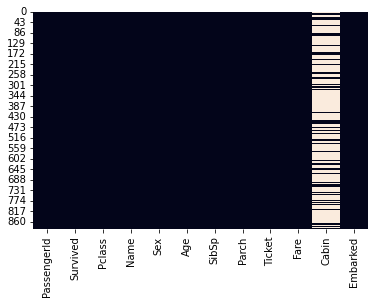

In [58]:
sns.heatmap(train.isnull(), cbar=False)


There's a lot of null values in the Cabin section (+80%), so I decided to remove it

In [59]:
del train['Cabin']

In [60]:
train.dropna(inplace=True)

In [61]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [62]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [63]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Deleting non relatable features for the classification

In [64]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [65]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [66]:
train = pd.concat([train,sex, embark], axis=1)

In [67]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


Splitting the model into train and test

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1),train['Survived'], test_size=0.3)

Training the model

In [73]:
logmodel = LogisticRegression(max_iter=1000)

In [74]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Evaluating the model

In [75]:
predictions = logmodel.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       171
           1       0.75      0.71      0.73        96

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267

